# Root Finding
1. Bisection method
1. Newton method
1. Secant method

## Bisection Method

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
def fct(x):
    return x**3
def fctPrime(x):
    return 3*x**2


In [ ]:
from numpy import sign
def bisection(f,low,high,x_tol,y_tol):
    s_low=sign(f(low))
    s_high=sign(f(high))
    if s_low*s_high!=-1:
        print('Error: Initial values of the function must have different signs')
        return 
    m=(low+high)/2
    while (high-low)>=(2*x_tol): # When false the answer is between m-x_tol and m+x_tol
        fm=f(m)
        # Not very accurate unless y_tol is extremely small
        if abs(fm)<=y_tol: # the value of the function is between 0-y_tol and 0+y_tol
            return m
        s_m=sign(fm)
        if s_m==s_low: # When true the answer is between m and high
            low=m
        else:          # the answer is between low and m
            high=m     
        m=(low+high)/2

    return m

root=bisection(fct,-2,9,10e-6,10e-12) 
print(root)
from math import sin
root=bisection(sin,-1,2,10e-6,10e-6)
print(root)


In [ ]:
from numpy import random,pi
def findInterval(f,low=-100,high=100,repeat=100):
  
    for i in range(repeat):
        x,y=random.uniform(low=low,high=high,size=2)
        if sign(f(x))!=sign(f(y)):
            if x<0:
                return x,y
            else:
                return y,x

r=findInterval(sin)
if r!=None:
    root=bisection(sin,r[0],r[1],10e-5,10e-5)
print(root/pi)

In [ ]:
import numpy as np
def func(x):
    return 10*x**2-x**3+18

r=findInterval(func)
if r!=None:
    root=bisection(func,r[0],r[1],10e-8,10e-12)
print(root)
print(func(root))

x=np.linspace(-5,12)
y=[func(v) for v in x]
plt.plot(x,y)
plt.plot([-5,12],[0,0])
plt.show()

## Newton-Ralphson Method

- Our goal is to find the root of a function $f(x)$, i.e. find $x$ for which $f(x)=0$
- Starting from an initial guess $x_i$, the equation of the tangent to $f(x)$ at $x=x_i$ is
$$y=f'(x_i)(x-x_i)+f(x_i)$$
- Where $f'(x_i)$ is the derivative of $f(x)$ evaluated at $x_i$
- The tangent crosses the x-axis when $y=0$ thus
$$x=x_i-\frac{f(x_i)}{f'(x_i)}$$
- That point is closer to the root than $x_i$.

In [ ]:
def func(x):
    return 10*x**2-x**3+18
def funcPrime(x):
    return 20*x-3*x**2

plt.figure(1)
x_i=8.5
x_i_1=x_i-func(x_i)/funcPrime(x_i)
x=np.linspace(7.5,12)
y=[func(v) for v in x]
plt.plot([x_i,x_i_1],[func(x_i),0],label="tangent")
plt.plot(x,y,label="f(x)")
plt.plot([7.5,12],[0,0],"k")
plt.legend(loc=0)
plt.text(x_i,-20,"$x_i$")
plt.text(x_i,130,"$f(x_i)$")

plt.text(x_i_1,-20,"$x_{i+1}$")
plt.plot([7.5,x_i],[func(x_i),func(x_i)],"--g")
plt.plot([x_i,x_i],[func(x_i),0],"--g")

#plt.show()
plt.figure(2)
x_i=x_i_1
x_i_1=x_i-func(x_i)/funcPrime(x_i)
x=np.linspace(7.5,12)
y=[func(v) for v in x]
plt.plot([x_i,x_i_1],[func(x_i),0],label="tangent")
plt.plot(x,y,label="f(x)")
plt.plot([7.5,12],[0,0],"k")
plt.legend(loc=0)
plt.text(x_i,20,"$x_i$")
plt.text(x_i,-130,"$f(x_i)$")

plt.text(x_i_1,20,"$x_{i+1}$")
plt.plot([7.5,x_i],[func(x_i),func(x_i)],"--g")
plt.plot([x_i,x_i],[func(x_i),0],"--g")

In [ ]:

def newton(f,fprime,guess,maxIter,y_tol):
    n,x=0,guess

    while n<=maxIter:
        fx=f(x)
        fpx=fprime(x)
        if abs(fx)<y_tol:
            return x
        x=x-fx/fpx
        n+=1
    return x

root=newton(func,funcPrime,4,1000,10e-5)
print(root)
func(root)

### Example 2

- Find $x$ such that $x=2\sin x$
- First we rewrite $f(x)=x-2\sin x$. Now we are looking for the root of $f(x)$
- $f'(x)=1-2\cos x$

In [ ]:
from numpy import sin,cos

def f(x):
    return x-2*sin(x)
def fprime(x):
    return 1-2*cos(x)

x=np.linspace(0,20)
y=[f(v) for v in x]
plt.plot(x,y)
plt.plot([0,6],[0,0])
root=newton(f,fprime,1,1000,10e-5)
print(root)
f(root)

### Secant Method

In [ ]:
from numpy import sin
def f(x):
    return x-2*sin(x)
def secant(f,x0,x1,maxIter,y_tol):
    n=0

    while n<=maxIter:

        fx0=f(x0)
        fx1=f(x1)
        fpx=(fx1-fx0)/(x1-x0)
        if abs(fx1)<y_tol:
            return x1
        x2=x1-fx1/fpx
        x0=x1
        x1=x2
        n+=1
    return x1

root=secant(f,1,1.1,1000,10e-5)
print(root)
#f(root)

### Example 3
- Estimate the value of _e_. We know that
$$\ln e=1$$
- Root of $$\ln x -1 =0$$

In [ ]:
from numpy import log,e
def f(x):
    return log(x)-1
def fp(x):
    return 1/x

root=newton(f,fp,8,1000,10e-5)
print(f'value={e:.4f},computed={root:.4f}')

In [ ]:
x=np.linspace(0.1,10)
y=[log(v) for v in x]
plt.plot(x,y)

## Symbolic Computation

- Symbolic computation allow us to manipulate and evaluate mathematical expression in a symbolic way
- We will be using sympy to perform symbolic computation

In [1]:
import sympy as sym


### Expressions

- Sympy manipulations are based on the concept of (mathematical) **expression**
- An expression can be
     1. A number
     1. A symbol (or variable)
     1. A combination of the above using **operators**
     1. Others (later)


### Numbers
1. Integers
1. Rationals
1. Floats

In [2]:
x=sym.Integer(8)
y=sym.Rational(1/2)
z=sym.Float(0.4)
print(x,y,z)


numerator=1,denominator=2
8 1/2 0.400000000000000


In [8]:
x=sym.sqrt(y)
z=sym.sqrt(sym.Rational(2,3))
display(x)
print(x)
print(x**2)

<class 'sympy.core.mul.Mul'>


sqrt(2)/2

sqrt(2)/2
1/2


#### Evaluate an expression

In [20]:
print(f'{x} evaluates to real as {x.evalf()}')
print(f'{y} evalutes to real as {y.evalf():.3f}')
display(z)
print(f'evaluates to read as {z.evalf():.5f}')


sqrt(2)/2 evaluates to real as 0.707106781186548
1/2 evalutes to real as 0.500


sqrt(6)/3

evaluates to read as 0.81650


### Symbols

The basic concepts in sympy are **Symbols** and **Constants**. Symbols are combined using operators to form expressions

In [21]:
## Python variable x is bound to symbol x

x=sym.Symbol('x')

## it is convenient to have the var name ans symbols be the same
## but it is not necessary
y=sym.Symbol('Z')
expr1=x/y
expr2=expr1+x
print(type(expr1))
print(type(expr2))

<class 'sympy.core.mul.Mul'>
<class 'sympy.core.add.Add'>


In [22]:
r=expr1.subs({x:3.2,y:2})
print(type(r))
a=sym.Integer(8)
print(type(a))
expr3=expr2+a
print(type(expr3))
r=expr3.subs({x:4,y:2})
type(r)
print(r)
print(expr3)

<class 'sympy.core.numbers.Float'>
<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.add.Add'>
14
x + 8 + x/Z


In [ ]:
print(sym.Integer(8))
print(sym.Rational(1,2))

In [ ]:

a=sym.Rational(1,3)
a*3
b=2/3
b
b*3

## Constructing and Manipulating Expressions

### Automatic simplification

- When an expression is defined or manipulated, sympy automatically simplifies it

In [ ]:
x=sym.Symbol('x')
y=sym.Symbol('y')
expr1=2*x+y+y
print(expr1)
expr2=expr1-x
print(expr2)

### Substitution

- Symbols in an expression can be substituted with values or other symbols
- the method ```expr.subs()``` takes either **one** or **two** parameters
   1. When **One** parameter is used is must be a dictionary
   1. When **two** parameters are used: the first is the symbol and the second is the substitution



In [ ]:
print(expr2)
expr2.subs(x,1)

In [ ]:
print(expr2)
expr2.subs({x:2,y:2})

In [ ]:
expr2.subs(x,sym.sqrt(y))

In [ ]:
print(expr2)
expr2.subs({x:sym.sqrt(y),y:4})

In [ ]:
expr3=(x-y)**2
print(expr3)

In [ ]:
expr3.expand()

### Simplification


In [ ]:
expr=(x+x*y)/x
print(expr)

In [ ]:
expr.expand()

In [ ]:
expr.simplify()

- So far the symbols _x_ and _y_ were treated as "regular" numbers which is the default
- We can tell sympy that they represent complex numbers, or expand trig functions

In [ ]:
expr=(x+y)**2
expr.expand(complex=True)## x=re(x)+i im(x), y=re(y)+i im(y)
expr=sym.cos(x+y)
expr.expand(trig=True)

#### What is the difference between expand and simplify?

- expand is one way sympy simplifies an expressions that is why we got the same answer sometimes.
- there are others like factor, collect...

In [ ]:
expr=x**2+y*x**2
print(expr)
print(expr.simplify()) # uses collect, i.e. collects all factors of x together


In [ ]:
expr=x**2+y*x**2+y
# this will not work since there are two choices and sympy doesn't know what to do: collect x or collect y
print(expr.simplify())
# we can tell it what to do
expr.collect(x)

#### other simplifications

In [ ]:
expr=sym.sin(x)**2+sym.cos(x)**2
print(expr.simplify())
## sometimes simplification is automatic
expr=(x**2/x**1)**2+y**3*y**4
print(expr)

## Calculus

### Limits

In [ ]:
x=sym.Symbol('x')
expr=sym.sin(x)/x
expr

In [ ]:
print(expr.limit(x,0))
print(expr.limit(x,sym.oo))
sym.limit(1/x,x,0)


### Differentiation

In [ ]:
expr=x**2+y
## derivative with respect to x
print(expr.diff(x))
## derivative with respect to y
print(expr.diff(y))
## second derivative with respect to x
expr.diff(x,2)

### Integration


In [ ]:
expr=x
expr.integrate(x)
sym.integrate(expr,x)

In [ ]:
expr=x*sym.exp(x**2)
display(expr.integrate())
expr=x*sym.sin(x)
expr.integrate()

In [ ]:
## definite integral

expr=sym.exp(-x**2)
r=expr.integrate((x,-sym.oo,sym.oo))
display(r)## uses latex to render the output
print(r) ## plain string representation, i.e. calls __str__
expr=x*sym.sin(x)
expr.integrate((x,0,sym.pi))

### Series expansion



In [ ]:
expr=sym.exp(x)
display(expr.series(x))
expr=sym.sin(x)
expr.series(x)

In [2]:
import sympy as sym
y=sym.Rational(2,3)
sym.symbols('x y')



(x, y)

## Equation Solving


In [258]:
import sympy as sym

x=sym.symbols('x')
## defines an equality relations
eq=sym.Eq(x**2,2)
display(sym.solveset(eq))

## alternatively we can pass an expression which is assumed to be equal to 0
r1=sym.solveset(x**4-1,x)
r2=sym.solveset(x**4-1,x,domain=sym.Reals)
display(r1)
display(r2)


FiniteSet(sqrt(2), -sqrt(2))

FiniteSet(-1, 1, I, -I)

FiniteSet(-1, 1)

#### Solving a system of equations

In [96]:
sym.solve((x+5*y-2,-3*x+6*y-15),(x,y))


{x: -3, y: 1}

In [260]:
f=x**4-3*x**2+1
r1=sym.factor(f)

r2=sym.solveset(f)
r3=sym.solveset(x**2-x-1)

display(r1)
display(r2)
display(r3)

(x**2 - x - 1)*(x**2 + x - 1)

FiniteSet(-1/2 + sqrt(5)/2, 1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2)

FiniteSet(1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2)

In [261]:
r=sym.factor(f,modulus=5)
r

(x - 2)**2*(x + 2)**2

To see why $x=2$ is a solution modulo 5 just perform the operations modulo 5

In [194]:
x=sym.symbols('x')
f=x**4-3*x**2+1
display(f)
fmod5=(x**4-3*x**2+1)%5
display(fmod5)
fmod5.subs(x,-2)
#v**4%5-3*v**2%5+1

x**4 - 3*x**2 + 1

Mod(x**4 - 3*x**2 + 1, 5)

0

#### No solution and unsolvable 

In [265]:
x=sym.symbols('x')
## no solution
r1=sym.solveset(sym.exp(x),x)
display(r1)

## sympy cannot solve this
r2=sym.solveset(sym.cos(x)-x,x)
display(r2)

## A solution for the above exists. It is around 0.7391
x=0.7391
sym.cos(x)-x

## Check out the plot below

EmptySet

ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

-2.48813116188185e-5

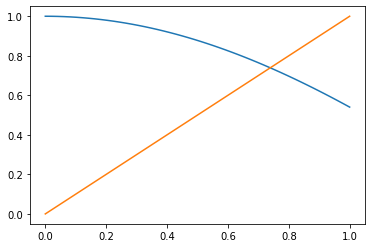

In [266]:
import numpy as np
import matplotlib.pyplot as plt 

x=np.linspace(0,1)
y=[np.cos(v) for v in x]
plt.plot(x,y,x,x)

#### Infinite number of solutions

In [31]:
r1=sym.solveset(x-x,x)
r2=sym.solveset(x-x,x,domain=sym.Reals)
display(r1)
display(r2)


S.Complexes

Reals

FiniteSet(-1, 1)

In [98]:
r1=sym.solveset(sym.sin(x)-1)
display(r1)

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

In [99]:
sym.solveset(x**2+1,domain=sym.Reals)

EmptySet

#### Multiple equations with constraints

In [103]:
sym.solve((sym.cos(x-y),y-sym.pi))

[{y: pi, x: pi/2}, {y: pi, x: 3*pi/2}]

### Satisfiability

In [267]:
x,y=sym.symbols('x y')
sym.satisfiable(x & y)

{y: True, x: True}

In [134]:
x,y=sym.symbols('x y')
sym.satisfiable((x& ~y) &(~x & y))

False

#### Example


| Name  | Availability |
|-------|--------------|
|  Adam | Available Monday and Wednesday and Friday|
|  Eve  | Not available on Tuesday |
|  John | Not available on Monday |
| Omar  | Available  Wednesday, Thursday and Friday |
|  Donald | Available on Tuesday and Friday |


In [202]:
m,t,w,r,f=sym.symbols('m t w r f')
expr=( ~ t & ~ r)  & (~ t) & (~m) & (~m & ~t) & (~m & ~w & ~r )
expr=expr & (m | t | w | r |f )
sym.satisfiable(expr)

{f: True, m: False, w: False, t: False, r: False}

#### Matrices

In [268]:
A=sym.Matrix([[1,x],[x,1]])
B=sym.Matrix([[1,2],[3,4]])
display(A*B)


Matrix([
[3*x + 1, 4*x + 2],
[  x + 3, 2*x + 4]])

In [278]:
x,y=sym.symbols('x y')
A=sym.Matrix([[x,y]])
C=sym.Matrix([[1,2]])
display(B*A.T)
display(C.T)
sym.solve(sym.Eq(B*A.T,C.T))


Matrix([
[  x + 2*y],
[3*x + 4*y]])

Matrix([
[1],
[2]])

{x: 0, y: 1/2}

## Differential Equations

In [60]:
x,y=sym.symbols('x y')

## define a function
f=sym.symbols('f',cls=sym.Function)
f(x)

f(x)

In [62]:
f(x).diff(x,2)+f(x)

f(x) + Derivative(f(x), (x, 2))

In [63]:
sym.dsolve(f(x).diff(x,2)+f(x),f(x))

Eq(f(x), C1*sin(x) + C2*cos(x))

In [240]:
h=sym.symbols('h',cls=sym.Function)
g=sym.Symbol('g')
r=sym.dsolve(h(x).diff(x,2)-g,h(x))
display(r)


Eq(h(x), C1 + C2*x + g*x**2/2)

#### Using boundary conditions

In [283]:
## Object initially at height 10m with initial velocity of 0
r=sym.dsolve(h(x).diff(x,2)+g,h(x),ics={h(x).subs(x,0):10,h(x).diff(x).subs(x,0):0})
display(r)
## gravitational constant, direction downwards
r=r.subs(g,9.81)
r.rhs
## At what time it hits the ground
sym.solve(r.rhs)


Eq(h(x), -g*x**2/2 + 10)

[-1.42784312292706, 1.42784312292706]